# Conjoint Analysis-Market Research
The objective of this assignment is to give you experience with ratings-based conjoint analysis.

### Part 1: Study Design

In [2]:
# Import the experimental design builder script.
import sys
sys.path.insert(1, '/data/Assignment-4')
import designer

**Task 1:** Define a variable called `attributes` that contains the attributes and levels within each attribute.  The viable shoukd be a dictionary where each attribute is a key and the value associated witht he key is a list of the levels.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `attributes` would be defined as follows.

```
attributes = {"color": ["red", "green"],
             "shape": ["round", "square"]}
```

In [35]:
attributes = {"Size": ["12oz", "16oz"],
             "Caffeine": ["Caffeine", "No Caffeine"],
             "Milk Type": ["Almond", "Dairy", "Soy"],
             "Flavour": ["Chocolate", "Vanilla", "Strawberry", "Salted Caramel"]}

In [105]:
# Use the designer script to find a matching design.
design = designer.get_design(attributes)
design

,Size,Caffeine,Milk Type,Flavour
0,16oz,Caffeine,Almond,Chocolate
1,12oz,Caffeine,Dairy,Salted Caramel
2,16oz,Caffeine,Dairy,Strawberry
3,16oz,No Caffeine,Dairy,Vanilla
4,12oz,Caffeine,Soy,Strawberry
5,16oz,No Caffeine,Soy,Chocolate
6,16oz,No Caffeine,Soy,Salted Caramel
7,12oz,No Caffeine,Almond,Strawberry
8,16oz,Caffeine,Almond,Salted Caramel
9,12oz,No Caffeine,Almond,Vanilla


### Parts 2 & 3: Write and administer the survey
**Task 2:** When you are done administering the survey:
- download CSV from qualtrics
- rename the file `survey.csv` and upload it here, and
- read the CSV file in as a pandas data frame called `raw_survey_results`.

In [38]:
import pandas as pd

In [44]:
raw_survey_results=pd.read_csv('Conjoint Analysis.csv')

In [345]:
len(raw_survey_results)

24

In [45]:
raw_survey_results.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q1_12
0,11/13/2019 18:44,11/13/2019 18:44,0,172.58.155.76,100,36,1,11/13/2019 18:44,R_1ojR3CIJA3gTQ6Q,NaN,...,5,3,4,6,5,2,5,5,6,5
1,11/13/2019 18:43,11/13/2019 18:45,0,98.26.34.244,100,86,1,11/13/2019 18:45,R_3KpM6P9gHFe508p,NaN,...,6,5,5,5,5,5,5,5,6,5
2,11/13/2019 18:43,11/13/2019 18:45,0,67.247.99.76,100,100,1,11/13/2019 18:45,R_3dT8nXbfw6tRTBm,NaN,...,5,3,5,7,2,5,2,2,3,7
3,11/13/2019 18:46,11/13/2019 18:47,0,216.165.95.145,100,70,1,11/13/2019 18:47,R_1ruhy9LtSUG2myn,NaN,...,5,6,5,6,5,6,6,6,6,7
4,11/13/2019 18:49,11/13/2019 18:50,0,174.109.114.196,100,60,1,11/13/2019 18:50,R_2frI905YiEFPmse,NaN,...,3,5,5,6,4,3,3,6,5,6


**Task 3:** Clean the data in preparation for analysis; name the clean data frame `clean_survey_results`.  You may need to do some or all of the following:
- remove rows and/or columns
- rename columns
- melt the data
- merge the data with the design data frame you created previously
The final data frame should have one row per rating with the following columns:
- some kind of respondent identifier to distinguish individuals
- the rating (1-7)
- one column for each attribute

In [113]:
survey=raw_survey_results.iloc[0:len(raw_survey_results),-12:]
survey.columns=['1','2','3','4','5','6','7','8','9','10','11','12']
survey['ResponseId']=raw_survey_results['ResponseId']
meltresult=pd.melt(survey,id_vars='ResponseId')

In [117]:
meltresult['variable']=meltresult['variable'].astype(str).astype(int)

In [118]:
design1=design
design1['variable']=design1.index+1
design1.variable.astype(int)
design1.head()

,Size,Caffeine,Milk Type,Flavour,variable
0,16oz,Caffeine,Almond,Chocolate,1
1,12oz,Caffeine,Dairy,Salted Caramel,2
2,16oz,Caffeine,Dairy,Strawberry,3
3,16oz,No Caffeine,Dairy,Vanilla,4
4,12oz,Caffeine,Soy,Strawberry,5


In [130]:
clean_survey_results=pd.merge(meltresult,design1,how='left')
clean_survey_results=clean_survey_results.drop(columns=['variable'])
clean_survey_results.head()

,ResponseId,value,Size,Caffeine,Milk Type,Flavour
0,R_1ojR3CIJA3gTQ6Q,4,16oz,Caffeine,Almond,Chocolate
1,R_3KpM6P9gHFe508p,4,16oz,Caffeine,Almond,Chocolate
2,R_3dT8nXbfw6tRTBm,4,16oz,Caffeine,Almond,Chocolate
3,R_1ruhy9LtSUG2myn,6,16oz,Caffeine,Almond,Chocolate
4,R_2frI905YiEFPmse,5,16oz,Caffeine,Almond,Chocolate


**Task 4:** Introduce dummy variables in preparation for anlaysis.  Now, for each attribute, there should be the number of levels minus one.  (The intercept captures the "default" level, and the part-worths for all other levels will be measured relative to the default utility.)

In [131]:
data = clean_survey_results
data['size_alt'] = data['Size'] == "16oz"

data['caffeine_alt'] = data['Caffeine'] == "Caffeine"

data['MilkType_alt'] = data['Milk Type'] == "Almond"
data['MilkType_alt2'] = data['Milk Type'] == "Dairy"

data['Flavour_alt'] = data['Flavour'] == "Chocolate"
data['Flavour_alt2'] = data['Flavour'] == "Vanilla"
data['Flavour_alt3'] = data['Flavour'] == "Strawberry"
#delete columns
data = data.drop(['Size', 'Caffeine', 'Milk Type','Flavour'], axis=1)
data.head(5)

,ResponseId,value,size_alt,caffeine_alt,MilkType_alt,MilkType_alt2,Flavour_alt,Flavour_alt2,Flavour_alt3
0,R_1ojR3CIJA3gTQ6Q,4,True,True,True,False,True,False,False
1,R_3KpM6P9gHFe508p,4,True,True,True,False,True,False,False
2,R_3dT8nXbfw6tRTBm,4,True,True,True,False,True,False,False
3,R_1ruhy9LtSUG2myn,6,True,True,True,False,True,False,False
4,R_2frI905YiEFPmse,5,True,True,True,False,True,False,False


### Part 4: Estimate the average and individual part-worths

You will use [sklearn's implementation of linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate part-worths.

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Task 5:** Compute the average part-worths by:
- splitting the data into `y` (the response/rating) and `X` (the explanatory variables/attribute levels), and
- Run a linear regression to estimate intercept and coefficients.

In [150]:
data_y=np.array(data.to_numpy()[:,1])
data_x=np.array(data.to_numpy()[:,2:], dtype=int)

In [151]:
lm1=LinearRegression().fit(data_x,data_y)
print(lm1.coef_)
print(lm1.intercept_)

[-0.15104167 -0.36979167 -0.57291667 -0.30208333  0.25173611  0.22916667
  0.32465278]
4.694444444444445


**Task 6:** Calculate the importance of each attribute by doing the following steps.
1. Compute the part-worth range for each attribute. 
2. Calculate the total range, summing the ranges over each attribute.
3. Calculate the importance for a single attribute as the range for that attribute over the total range.

In [156]:
#1,Compute the part-worth range for each attribute.
Size_pwr=max(0,lm1.coef_[0])-min(0,lm1.coef_[0])
Caffeine_pwr=max(0,lm1.coef_[1])-min(0,lm1.coef_[1])
MilkType_pwr=max(0,lm1.coef_[2],lm1.coef_[3])-min(0,lm1.coef_[2],lm1.coef_[3])
Flavour_pwr=max(0,lm1.coef_[4],lm1.coef_[5],lm1.coef_[6])-min(0,lm1.coef_[4],lm1.coef_[5],lm1.coef_[6])
print(Size_pwr,Caffeine_pwr,MilkType_pwr,Flavour_pwr)

0.15104166666666674 0.36979166666666685 0.5729166666666669 0.3246527777777778


In [157]:
#2,Calculate the total range, summing the ranges over each attribute.
ttl_range=Size_pwr+Caffeine_pwr+MilkType_pwr+Flavour_pwr
ttl_range

1.4184027777777781

In [346]:
#Calculate the importance for a single attribute as the range for that attribute over the total range.
Size_imp=round((Size_pwr/ttl_range),3)
Caffeine_imp=round((Caffeine_pwr/ttl_range),3)
MilkType_imp=round((MilkType_pwr/ttl_range),3)
Flavour_imp=round((Flavour_pwr/ttl_range),3)
print(Size_imp,Caffeine_imp,MilkType_imp,Flavour_imp)

0.106 0.261 0.404 0.229


**Task 7:** Now calculate individual part-worths.  You will do this by dividing up the data by individual respondent and running one regression for each respondent.  You should write a loop to iterate over all the respondents instead of doing each one manually.

You will want to create a data frame called `individual_part_worths` that has one row per individual respondent; the columns should be the respondent identifier, the intercept of the regression, and all the coefficients of the regression.

In [166]:
#data preparation for loop linear regression
ipwdata=data
ipwdata=ipwdata.replace(True,1)
ipwdatat=ipwdata.replace(False,0)
ipwdata.head()

,ResponseId,value,size_alt,caffeine_alt,MilkType_alt,MilkType_alt2,Flavour_alt,Flavour_alt2,Flavour_alt3
0,R_1ojR3CIJA3gTQ6Q,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,R_3KpM6P9gHFe508p,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,R_3dT8nXbfw6tRTBm,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,R_1ruhy9LtSUG2myn,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,R_2frI905YiEFPmse,5,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [187]:
respondents=list(ipwdata['ResponseId'].unique())
len(respondents)

24

In [184]:
#a loop to iterate over all the respondents
#models is a list of models for each respondents
models=[]
for i in respondents:
    respondentdata= ipwdata.loc[ipwdata['ResponseId']==i]
    respondent_x=respondentdata.iloc[:,-7:]
    respondent_y=respondentdata.iloc[:,1]
    lm=LinearRegression().fit(respondent_x,respondent_y)
    models.append(lm)
models[0].coef_

array([ 0.375     ,  0.5       , -1.25      , -1.25      ,  0.83333333,
        0.625     , -0.54166667])

In [194]:
intercept=[]
for i in models:
    intc=i.intercept_
    intercept.append(intc)
intercept=pd.DataFrame(intercept,columns=['intercept'])

In [202]:
coef=[]
for i in models:
    coe=i.coef_
    coef.append(coe)
coef=pd.DataFrame(coef,columns=['size','caffeine','MilkType1','MilkType2','Flavour1','Flavour2','Flavour3'])
coef

,size,caffeine,MilkType1,MilkType2,Flavour1,Flavour2,Flavour3
0,0.375,5.000000e-01,-1.250000e+00,-1.250000e+00,0.833333,6.250000e-01,-0.541667
1,-0.500,3.750000e-01,-5.000000e-01,5.000000e-01,-0.875000,-3.750000e-01,-0.500000
2,-0.500,-5.000000e-01,-1.000000e+00,2.500000e-01,3.500000,2.331468e-15,2.500000
3,-0.250,-2.500000e-01,5.000000e-01,2.500000e-01,0.916667,5.000000e-01,-0.083333
4,-0.625,-2.500000e-01,-7.500000e-01,-5.000000e-01,1.916667,1.375000e+00,-0.208333
5,-0.125,2.500000e-01,-7.500000e-01,-2.500000e-01,1.750000,3.375000e+00,1.625000
6,-0.250,-8.750000e-01,4.440892e-16,7.500000e-01,-1.625000,-3.750000e-01,-2.750000
7,-0.125,-8.750000e-01,-1.250000e+00,-2.500000e-01,4.041667,3.000000e+00,4.291667
8,0.375,-7.500000e-01,2.500000e-01,2.500000e-01,0.750000,1.875000e+00,1.125000
9,-0.375,-2.500000e-01,7.500000e-01,-2.500000e-01,2.583333,2.125000e+00,2.208333


In [205]:
#create a data frame called individual_part_worths 
#that has one row per individual respondent; 
#the columns should be the respondent identifier, the intercept of the regression, and all the coefficients of the regression
individual_part_worths = pd.DataFrame(respondents,columns=['RespondenseID'])

individual_part_worths=pd.concat([individual_part_worths,intercept,coef],axis=1)
individual_part_worths

,RespondenseID,intercept,size,caffeine,MilkType1,MilkType2,Flavour1,Flavour2,Flavour3
0,R_1ojR3CIJA3gTQ6Q,4.583333,0.375,5.000000e-01,-1.250000e+00,-1.250000e+00,0.833333,6.250000e-01,-0.541667
1,R_3KpM6P9gHFe508p,5.750000,-0.500,3.750000e-01,-5.000000e-01,5.000000e-01,-0.875000,-3.750000e-01,-0.500000
2,R_3dT8nXbfw6tRTBm,3.250000,-0.500,-5.000000e-01,-1.000000e+00,2.500000e-01,3.500000,2.331468e-15,2.500000
3,R_1ruhy9LtSUG2myn,5.416667,-0.250,-2.500000e-01,5.000000e-01,2.500000e-01,0.916667,5.000000e-01,-0.083333
4,R_2frI905YiEFPmse,4.666667,-0.625,-2.500000e-01,-7.500000e-01,-5.000000e-01,1.916667,1.375000e+00,-0.208333
5,R_6maFOYe4gK93GNz,3.250000,-0.125,2.500000e-01,-7.500000e-01,-2.500000e-01,1.750000,3.375000e+00,1.625000
6,R_8HSRnsB6Cn2mYut,7.500000,-0.250,-8.750000e-01,4.440892e-16,7.500000e-01,-1.625000,-3.750000e-01,-2.750000
7,R_1KfiAtoK72NQTgI,2.166667,-0.125,-8.750000e-01,-1.250000e+00,-2.500000e-01,4.041667,3.000000e+00,4.291667
8,R_ZqR48ERTblOfsQh,3.750000,0.375,-7.500000e-01,2.500000e-01,2.500000e-01,0.750000,1.875000e+00,1.125000
9,R_7ZGyPluzX3S0OdP,3.583333,-0.375,-2.500000e-01,7.500000e-01,-2.500000e-01,2.583333,2.125000e+00,2.208333


In [348]:
individual_part_worths.to_csv('individual_part_worths.csv')

**Task 8:** Create a visualization of the individual respondent coefficients and intercepts.  On the x axis should have categories for each of the level dummy variables and default; on the y-axis should be the part-worths (the values of the coefficients and the intercepts).  You should ploth both a summary of the part-worths (e.g., a violin plot, or box and whiskers) and the individual values.

In [206]:
# Set up R, if desired for visualization
import rpy2.ipython
%reload_ext rpy2.ipython

In [355]:
import matplotlib.pyplot as plt

In [363]:
visual=individual_part_worths.iloc[:,1:]
visual

,intercept,size,caffeine,MilkType1,MilkType2,Flavour1,Flavour2,Flavour3
0,4.583333,0.375,5.000000e-01,-1.250000e+00,-1.250000e+00,0.833333,6.250000e-01,-0.541667
1,5.750000,-0.500,3.750000e-01,-5.000000e-01,5.000000e-01,-0.875000,-3.750000e-01,-0.500000
2,3.250000,-0.500,-5.000000e-01,-1.000000e+00,2.500000e-01,3.500000,2.331468e-15,2.500000
3,5.416667,-0.250,-2.500000e-01,5.000000e-01,2.500000e-01,0.916667,5.000000e-01,-0.083333
4,4.666667,-0.625,-2.500000e-01,-7.500000e-01,-5.000000e-01,1.916667,1.375000e+00,-0.208333
5,3.250000,-0.125,2.500000e-01,-7.500000e-01,-2.500000e-01,1.750000,3.375000e+00,1.625000
6,7.500000,-0.250,-8.750000e-01,4.440892e-16,7.500000e-01,-1.625000,-3.750000e-01,-2.750000
7,2.166667,-0.125,-8.750000e-01,-1.250000e+00,-2.500000e-01,4.041667,3.000000e+00,4.291667
8,3.750000,0.375,-7.500000e-01,2.500000e-01,2.500000e-01,0.750000,1.875000e+00,1.125000
9,3.583333,-0.375,-2.500000e-01,7.500000e-01,-2.500000e-01,2.583333,2.125000e+00,2.208333


<Figure size 2880x2880 with 0 Axes>

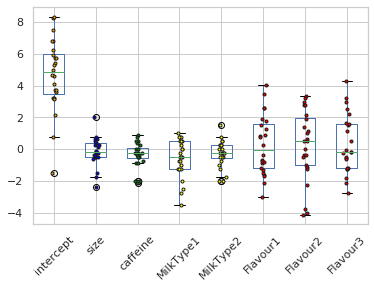

<Figure size 2880x2880 with 0 Axes>

In [379]:
visual.boxplot()

for i,d in enumerate(visual):
    y = visual[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["orange","blue","green","yellow","yellow","red","red","red"][i], mec='k', ms=3, marker="o", linestyle="None")
plt.xticks(rotation=45)
plt.figure(figsize=(40,40))

#### Analysis 
We created a graph above in which X axis have categories for each of the level dummy variables and Y
axis shows the values of the coefficients and the intercepts which is the part worth. It includes both the
summary and the individual value of the part worth.

For the effect of different level of each attribute. Overall 16oz size and Caffeine shows negative effect
compared to the default level (12oz and No Caffeine) with “no caffeine” being strongly preferred and
ranked as the most important attribute. And the range of these two coefficients among different
respondent is relatively small compared to Milk Type and Flavour which means people show similar
preference towards these two attributes. Preference ranges amongst Milk Type was more varied, with
the range being larger for almond milk and smaller for dairy. However, almond milk is still the least
popular configuration of an attribute. Flavour is the most personalized attributes among these four with
strawberry being the most ideal since it has the largest range of preferences as demonstrated by the gap
between the 1st and 3rd quartile.

In our following step of deciding on the marketing strategy we should focus more on the diversity of
Flavour since people’s taste varies a lot. Also, as a hearth-oriented drink, being No Caffeine can be a
strong signal of showing the concept of ‘health’.

### Part 5: Simulate the Market
**Task 9:** Write a function `utility` that takes two arguments:
- `product`: a list of which level has been selected for each attribute.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `product` could take the value `["red", "square"]`.
- `part_worths`: a row from the `individual_part_worths` data frame created for Task 6 (i.e., one individual's part-worths) .

The `utility` function should compute and return the utility of the specified individual for the specified product; this is the intercept plus any relevant part-worths that correspond to the product's attribute levels.

In [278]:
def utility(product,part_worths):
    u = part_worths[1]
    if product[0]=='16oz':
        u+=part_worths[2]
    if product[1]=='Caffeine':
        u+=part_worths[3]
    if product[2]=='Almond':
        u+=part_worths[4]
    if product[2]=='Dairy':
        u+=part_worths[5]
    if product[3]=='Chocolate':
        u+=part_worths[6]
    if product[3]=='Vanilla':
        u+=part_worths[7]
    if product[3]=='Strawberry':
        u+=part_worths[8]
    return u

In [277]:
#test the function utility
product=['16oz','Caffeine','Dairy','Vanilla']
part_worths=individual_part_worths.iloc[1,:]
u
part_worths.Flavour1
utility(product,part_worths)
#utility(product,part_worths)
#type(part_worths)
#part_worths
#part_worths[1]

5.750000000000001

**Task 10:** Write a function `choose_product` that takes two arguments:
- `products`: a list of products, where each product is its own list as specified in Task 8, (Yes, it's a list of lists!)
- `part_worths`: a row of inidivudual part worths, just as used in Task 8.

This fuction should return a numpy array with the same length as the number of products; this array should contain a boolean value (true or false) for each product.  The value for a product should be true if it maximizes the utility for the individual; as multiple products can have equivalent utilities, more than one product might maximize utility.

As an example, if there are two products, the `choose_product` function could return `[True, False]` if the first product maximizes the utility, `[False, True]` if the second product maximizes utility, or `[True, True]` if both products have the same utility and therefor both maximize utility for specified the individual.

In [294]:
def choose_product(products,part_worths):
    max_utility = 0
    utilitylist=[]
    result=[]
    for i in products:
        u = utility(i,part_worths)
        utilitylist.append(u)
        if u > max_utility:
            max_utility = u
    for j in utilitylist:
        if j < max_utility:
            result.append(False)
        if j == max_utility:
            result.append(True)
    return result

In [295]:
#test function choose_product
products=[['12oz','Caffeine','Almond','Chocolate'],
         ['16oz','Caffeine','Dairy','Vanilla']]
part_worths=individual_part_worths.iloc[2,:]
choose_product(products,part_worths)

[True, False]

**Task 11:** Write a function `simulate` that takes two arguments:
- `products`: a list of products, identitcal to the argument for Task 9.
- The `individual_part_worths` data frame created for Task 7.

This function should simulate the market share of the products by having each individual choose a product from the list.  For an individual who chooses more than one item (multiple items are tied for the top utility value), their "vote" is split between the tied items.  The function should return an array of proportions of market share.  

In [330]:
def simulate(products,individual_data_worths):
    choose_result=[]
    number = []
    marketshare = []
    for i in range(len(individual_part_worths)) :
        part_worths=individual_part_worths.iloc[i,:]
        choose_result.append(choose_product(products,part_worths))
    for i in range(len(products)):
        a = 0
        for j in range(len(individual_part_worths)) :
            a += choose_result[j][i]
        number.append(a)
    for i in range(len(products)):
        share=round(number[i]/sum(number),4)
        marketshare.append(share)
    return marketshare

**Task 12:** Create a variable called `my_product` that has the ideal value (maximum average utility) based on what you discovered in Task 5; this should be in the format described in Task 9.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `my_product` could take the value `["red", "square"]`.  Also create three competitiors (e.g., `competitor1`) using this same format.  Create a list called `all_products` that contains all four products and simulate the market with the products.

In [343]:
my_product=['12oz','No Caffeine','Soy','Strawberry']
competitor1=['12oz','Caffeine','Almond','Vanilla']
competitor2=['16oz','No Caffeine','Almond','Chocolate']
competitor3=['12oz','Caffeine','Dairy','Salted Caramel']

all_products=[my_product,competitor1,competitor2,competitor3]
simulate(all_products,individual_part_worths)              

[0.3333, 0.2083, 0.25, 0.2083]

**Task 13:** Redefine `my_product` such that the most important attribute (from Task 6) now has the least liked level (per what you found in Task 5) and rerun the market simulation keeping the competitors the same.

In [344]:
my_product=['12oz','Caffeine','Soy','Strawberry']
competitor1=['12oz','Caffeine','Almond','Vanilla']
competitor2=['16oz','No Caffeine','Almond','Chocolate']
competitor3=['12oz','Caffeine','Dairy','Salted Caramel']

all_products=[my_product,competitor1,competitor2,competitor3]
simulate(all_products,individual_part_worths)  

[0.2083, 0.25, 0.2917, 0.25]

### Task Analysis based on business settings
What competitor products did you use in the simulations? Why? What was the forecasted market share for the ideal product (Task 12)? What was your modified product for Task 13? What was the forecasted market share for the modified product (Task 13)? Was there any change in forecasted market share? Why or why not?

We reviewed some of the popular products currently in the market that share similar attributes with our ideal product since we will compete against them for customers. Target competitor products we have examined include: Almond Breeze Almond Milk with Chocolate and Strawberry flavours, Vega Protein & Energy with 3g MCT Oil Cold Brew Coffee, and Premier Protein Strawberries & Cream High Protein Shakes. We therefore created three competitor products with the following attributes:

**1) 12oz, Caffeine, Almond, Vanilla**  

**2) 16oz, No Caffeine, Almond, Chocolate**

**3) 12oz, Caffeine, Dairy, Salted Caramel**

These product variations will contain all the attributes of our product so that we are able to gain an understanding of what percentage of the market will prefer our product versus our competitors’.

The forecasted market share for the ideal product (12oz, No Caffeine, Soy, Strawberry) is 33.33%.

Since attribute “Caffeine” has the highest importance in our product, our modified product with the most important attribute set to the least liked level is 12oz, Caffeine, Soy, Strawberry. The forecasted market share of the modified product is now 20.83%. Our market share dropped by 12.5%. This is because our customers view caffeine content as the most important factor that impact their buying decision of products within the healthy drink category. When the ideal product is modified to containing caffeine, a huge proportion of the customers will decide not to buy our products even if the size, flavour, and milk type match their preference. 